In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer


In [2]:
df = pd.read_csv('DatasetCredit-g.csv')

# Display the first few rows
#print(df.head())
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   checking_status         1000 non-null   object 
 1   duration                1000 non-null   int64  
 2   credit_history          1000 non-null   object 
 3   purpose                 1000 non-null   object 
 4   credit_amount           1000 non-null   float64
 5   savings_status          1000 non-null   object 
 6   employment              1000 non-null   object 
 7   installment_commitment  1000 non-null   int64  
 8   personal_status         1000 non-null   object 
 9   other_parties           1000 non-null   object 
 10  residence_since         1000 non-null   int64  
 11  property_magnitude      1000 non-null   object 
 12  age                     1000 non-null   int64  
 13  other_payment_plans     1000 non-null   object 
 14  housing                 1000 non-null   o

In [3]:


# Binary labels 
mapping_foreign = {'no': 0, 'yes': 1}
mapping = {'bad': 0, 'good': 1}


df['class_binary'] = df['class'].map(mapping)
df['foreign'] = df['foreign_worker'].map(mapping_foreign)
df = df.drop(columns=['foreign_worker', 'class'])
print(df)

    checking_status  duration                  credit_history  \
0                <0         6  critical/other existing credit   
1          0<=X<200        48                   existing paid   
2       no checking        12  critical/other existing credit   
3                <0        42                   existing paid   
4                <0        24              delayed previously   
..              ...       ...                             ...   
995     no checking        12                   existing paid   
996              <0        30                   existing paid   
997     no checking        12                   existing paid   
998              <0        45                   existing paid   
999        0<=X<200        45  critical/other existing credit   

                 purpose  credit_amount    savings_status  employment  \
0               radio/tv         1169.0  no known savings         >=7   
1               radio/tv         5951.0              <100      1<=X<4   


In [ ]:
// df_binary = pd.get_dummies(data_frame["class","foreign_worker"], prefix='Binary')
// print(df_bi


In [ ]:
// Isto preve o risco por agora, dps usar  amesma logica ma para credito, ja temos de criar outro modelo
// Com o teste, verifica a previsao e verifica overfitting e isso

In [4]:
print(df.select_dtypes(include=['object']).columns)

Index(['checking_status', 'credit_history', 'purpose', 'savings_status',
       'employment', 'personal_status', 'other_parties', 'property_magnitude',
       'other_payment_plans', 'housing', 'job', 'own_telephone'],
      dtype='object')


In [5]:
import numpy as np
from sklearn.metrics import confusion_matrix, make_scorer


profit_matrix = np.array([
    [0,   -200],   
    [-200, 100]    
])

def profit_score(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred, labels=[1, 0])
    return (cm * profit_matrix).sum() # soma final sendo o nosso objetivo ter o maximo possivel de lucro

profit_scorer = make_scorer(profit_score, greater_is_better=True)

In [6]:

data_x = df.drop(columns=["class_binary"])
X= data_x
y= df["class_binary"]

categorical_features = X.select_dtypes(include=["object"]).columns
numeric_features = X.select_dtypes(exclude=["object"]).columns

preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_features),
        ("num", "passthrough", numeric_features)
    ]
)


X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)
rf_classifier.fit(X_train_processed, y_train)

y_pred = rf_classifier.predict(X_test_processed)

print(classification_report(y_pred, y_test))

# Nos nao priorizamos a acuracia, mas sim o lucro
from sklearn.model_selection import GridSearchCV

param_grid_search = {
    'n_estimators': [100, 200, 150],
    'max_depth': [None, 5, 10, 20, 50],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Use the profit_scorer defined earlier
grid_search = GridSearchCV(
    estimator=rf_classifier,
    param_grid=param_grid_search,
    cv=3,
    verbose=2,
    scoring=profit_scorer,
    error_score='raise'
)
grid_search.fit(X_train_processed, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Estimator:", grid_search.best_estimator_)
print("Best Profit Score:", grid_search.best_score_)
#Má previsao e recall para valores 0, ver o que posso fazer para melhorar


              precision    recall  f1-score   support

           0       0.34      0.74      0.47        42
           1       0.95      0.77      0.85       258

    accuracy                           0.76       300
   macro avg       0.64      0.75      0.66       300
weighted avg       0.86      0.76      0.79       300

Fitting 3 folds for each of 60 candidates, totalling 180 fits
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time= 

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

data_x = df.drop(columns=["class_binary"])
X= data_x
y= df["class_binary"]

categorical_features = X.select_dtypes(include=["object"]).columns
numeric_features = X.select_dtypes(exclude=["object"]).columns

preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_features),
        ("num", "passthrough", numeric_features)
    ]
)

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)
rf_classifier.fit(X_train_processed, y_train)

y_pred = rf_classifier.predict(X_test_processed)

print(classification_report(y_pred, y_test))

# Nos nao priorizamos a acuracia, mas sim o lucro
param_dist = {
    'n_estimators': [100, 200, 150],
    'max_depth': [None, 5, 10, 20, 50],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Use the profit_scorer defined earlier
random_search = RandomizedSearchCV(
    estimator=rf_classifier,
    param_distributions=param_dist,
    n_iter=10,
    cv=3,
    verbose=2,
    scoring=profit_scorer,
    error_score='raise',
    random_state=42
)
random_search.fit(X_train_processed, y_train)

print("Best Parameters:", random_search.best_params_)
print("Best Estimator:", random_search.best_estimator_)
print("Best Profit Score:", random_search.best_score_)
#Má previsao e recall para valores 0, ver o que posso fazer para melhorar


TypeError: 'numpy.float64' object is not iterable

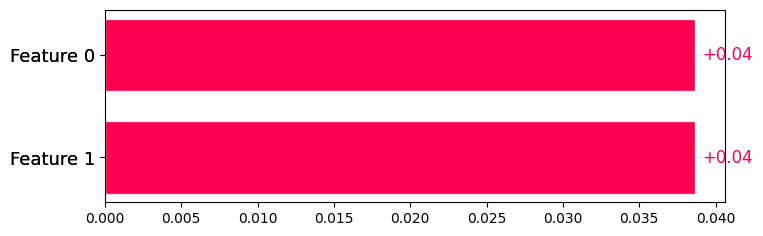

In [ ]:
import shap
explainer = shap.Explainer(rf_classifier)
shap_values = explainer(X_test_processed)
#shap.initjs()



In [ ]:
from sklearn.model_selection import RandomizedSearchCV


random_search = RandomizedSearchCV(RandomForestClassifier(),
                                   param_grid= param_grid_search)
random_search.fit(X_train, y_train)
print(random_search.best_estimator_) 

In [ ]:
from sklearn.metrics import make_scorer

def profit_function(y_true, y_pred):
    within_margin = np.abs(y_true - y_pred) / y_true < 0.3
    return 100 * within_margin.sum()   # total profit

profit_scorer = make_scorer(profit_function, greater_is_better=True)

#Isto é para o outro modelo que em vez de avaliar o risco. avalia o credito

In [ ]:
#Aqui o P é o valor previsto do nosso modelo, o Y é o suposto "desejado", não sei bem o que quer dizer
#tenho que fazer dois modelos, um para prever o risco e outro para prever o credit amount requested mesmo para utilizar na função como o P

def calculate_f(Y, P):
    if abs(Y - P) / Y < 0.3:
        return 100
    else:
        return 0


In [ ]:
# Test the function with different Y and P values
Y = 100
P = 70

result = calculate_f(Y, P)
print(f"f({Y}, {P}) = {result}")


In [ ]:
# Utilizar XGBoost regression como usaste em DAA, ver como fizeste isso em DAA

In [ ]:
# falta me só ver como é que vou passar as labels